# Stanford Dogs - A Classfication problem

Classification is a fundamental task in machine learning, and the Stanford Dogs Dataset provides a valuable resource for training and evaluating classification models. The dataset consists of images of various dog breeds, each labeled with the corresponding breed.

By leveraging this dataset, we can develop a classification model that can accurately identify the breed of a given dog image. This can have practical applications in areas such as pet identification, animal welfare, and breed-specific research.

To build a classification model using the Stanford Dogs Dataset, we can employ various machine learning techniques, such as convolutional neural networks (CNNs). CNNs are particularly effective for image classification tasks, as they can automatically learn relevant features from the input images.

By training a CNN on the Stanford Dogs Dataset, we can teach the model to recognize distinctive patterns and characteristics of different dog breeds. Once trained, the model can be used to classify new dog images, providing predictions about the breed with a certain level of confidence.

Evaluation of the classification model can be done using metrics such as accuracy, precision, recall, and F1 score. These metrics help assess the model's performance and determine its effectiveness in correctly classifying dog breeds.

Overall, the Stanford Dogs Dataset offers a valuable opportunity to explore and develop classification models for dog breed identification. By leveraging this dataset and employing appropriate machine learning techniques, we can contribute to the field of computer vision and enhance our understanding of dog breeds.

## 00 - Preprocessing ⚙️

The dataset is split into two parts - Images and Annotations. 

The **Images** are pictures of the 120 different dog breeds present in the dataset. 
The **Annotations** are `.xml`-files, which contains information about where the dog is located in the different pictures and what breed it is.

So first of all we need to load all of these informations into Python, so they can be used to train our model.

Found 14228 images belonging to 119 classes.
Found 2998 images belonging to 119 classes.
Found 3172 images belonging to 119 classes.


c:\Users\marcu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


c:\Users\marcu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


445/445 ━━━━━━━━━━━━━━━━━━━━ 91s 201ms/step - accuracy: 0.0106 - loss: 4.7977 - val_accuracy: 0.0223 - val_loss: 4.5987
Epoch 2/15
445/445 ━━━━━━━━━━━━━━━━━━━━ 91s 202ms/step - accuracy: 0.0242 - loss: 4.5888 - val_accuracy: 0.0407 - val_loss: 4.3753
Epoch 3/15
445/445 ━━━━━━━━━━━━━━━━━━━━ 87s 194ms/step - accuracy: 0.0412 - loss: 4.4001 - val_accuracy: 0.0560 - val_loss: 4.2235
Epoch 4/15
445/445 ━━━━━━━━━━━━━━━━━━━━ 87s 194ms/step - accuracy: 0.0517 - loss: 4.2865 - val_accuracy: 0.0710 - val_loss: 4.1556
Epoch 5/15
445/445 ━━━━━━━━━━━━━━━━━━━━ 88s 196ms/step - accuracy: 0.0683 - loss: 4.1759 - val_accuracy: 0.0684 - val_loss: 4.1507
Epoch 6/15
445/445 ━━━━━━━━━━━━━━━━━━━━ 88s 197ms/step - accuracy: 0.0804 - loss: 4.0869 - val_accuracy: 0.0801 - val_loss: 4.0142
Epoch 7/15
445/445 ━━━━━━━━━━━━━━━━━━━━ 88s 197ms/step - accuracy: 0.0882 - loss: 3.9888 - val_accuracy: 0.1007 - val_loss: 3.9556
Epoch 8/15
445/445 ━━━━━━━━━━━━━━━━━━━━ 89s 199ms/step - accuracy: 0.1013 - loss: 3.9120 - val

c:\Users\marcu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marcu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marcu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

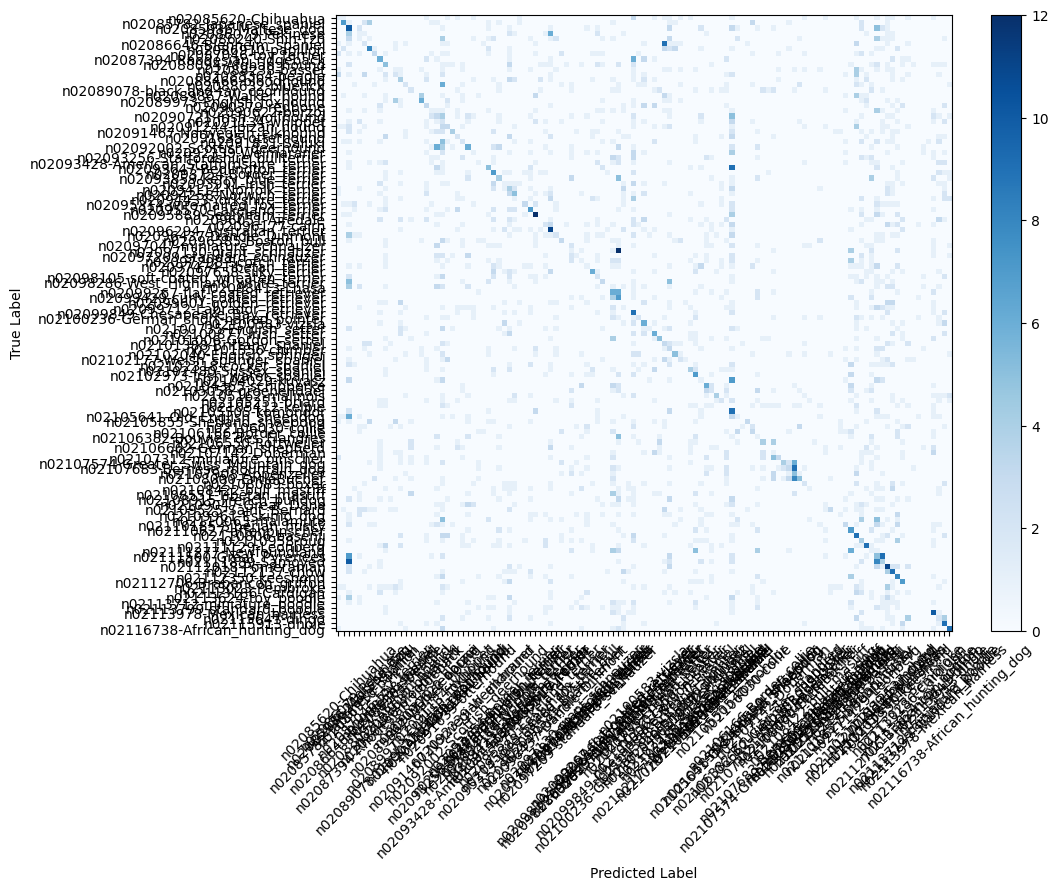

In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from PIL import Image, ImageFile

# Enable loading of truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Function to remove corrupted images
def remove_corrupted_images(directory):
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(subdir, file)
            try:
                img = Image.open(filepath)
                img.verify()
            except (IOError, SyntaxError) as e:
                print(f'Removing corrupted image: {filepath}')
                os.remove(filepath)

# Set paths to the dataset folders
base_dir = 'data2/'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Remove corrupted images from all datasets
remove_corrupted_images(train_dir)
remove_corrupted_images(valid_dir)
remove_corrupted_images(test_dir)

# Define image parameters
img_height, img_width = 150, 150
batch_size = 32

# Create image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_test_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = valid_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=valid_generator
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.2f}')

# Generate predictions for test data
predictions = model.predict(test_generator)
predicted_classes = predictions.argmax(axis=1)

# Generate the classification report and confusion matrix
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print('Classification Report')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

print('Confusion Matrix')
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = range(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Now the Images and Annotations have been loaded into Python. So the next step is to split the dataset into three parts: *Train*, *Test* and *Validation*.

We have chosen to do the typical ``70-20-10`` split

Total samples (Subset): 4850

Number of samples in the training set: 3395 (70.00%)
Number of samples in the validation set: 970 (20.00%)
Number of samples in the test set: 485 (10.00%)


## 01 - Compiling the model 🔧

The next step in the process is to compile the model itself. But before that we have define what **Loss function**, **Optimizer** and **Metrics** we are going to be using on this model.

For the **Loss function** We have a few different options:

(*Name a few different loss functions that would make sense to use for this project.*)

For the **Optizimers** we also have a few different options:
- *Adam*, *SGD*, *RMSProp* etc.

For the **Metrcis** we also have a few different options:
- *Accuarcy*, *PRecision*, *Recall*, *F1 score* etc.


In [4]:
import os
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from PIL import Image, ImageFile
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Enable loading of truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Create the models directory if it doesn't exist
models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Function to remove corrupted images
def remove_corrupted_images(directory):
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(subdir, file)
            try:
                img = Image.open(filepath)
                img.verify()
            except (IOError, SyntaxError) as e:
                print(f'Removing corrupted image: {filepath}')
                os.remove(filepath)

# Set paths to the dataset folders
base_dir = 'data2/'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Remove corrupted images from all datasets
remove_corrupted_images(train_dir)
remove_corrupted_images(valid_dir)
remove_corrupted_images(test_dir)

# Define image parameters
img_height, img_width = 224, 224  # Adjusted to VGG16 input size
batch_size = 32

# Create image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_test_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = valid_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Define the best model file path in the models directory
best_model_path = os.path.join(models_dir, 'model1.keras')

# Check if a saved model exists
if os.path.exists(best_model_path):
    print(f'Loading existing model from {best_model_path}')
    model = tf.keras.models.load_model(best_model_path)
else:
    # Load VGG16 pre-trained model and customize it
    vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    vgg16_base.trainable = False

    model = tf.keras.Sequential([
        vgg16_base,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Checkpoint to save the best model based on validation loss
    checkpoint = ModelCheckpoint(
        best_model_path, monitor='val_loss', save_best_only=True, verbose=1, mode='min'
    )

    # Learning rate scheduler callback
    lr_schedule = ReduceLROnPlateau(
        monitor='val_loss', factor=0.1, patience=3, verbose=1
    )

    # Train the model
    history = model.fit(
        train_generator,
        epochs=100,
        validation_data=valid_generator,
        callbacks=[checkpoint, lr_schedule]
    )

    print(f'Best model saved to {best_model_path}')

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.2f}')

# Generate predictions for test data
predictions = model.predict(test_generator)
predicted_classes = predictions.argmax(axis=1)

# Generate the classification report and confusion matrix
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print('Classification Report')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


Found 14228 images belonging to 119 classes.
Found 2998 images belonging to 119 classes.
Found 3172 images belonging to 119 classes.
Epoch 1/100


c:\Users\marcu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 84/445 ━━━━━━━━━━━━━━━━━━━━ 5:44 953ms/step - accuracy: 0.0104 - loss: 5.0017

KeyboardInterrupt: 

## 02 - Train the model 🧠

The next step in the process is to train the now compiled model on our data. Here we also have a little exploratory work in figuring out:
- What *batch size* should we use?
- What *number of epochs* should we use?
- Is the model *overfitting* or *underfitting*?



## Futher plan!

1. **Choose the model architecture suitable for our problem** 🤔
    - Convolutional Neural Network (CNN - Good with Image data)
    - Recurrent Neural Network (RNN - Good with sequence data)
    - Another type??

2. **Compile our model** 🔧
    - What *Loss function* should we use? - Cross-entropy is used for classification?
    - What *Optimizer* should we use? Adam, SGD, RMSProp etc.
    - What *Metrics* should we use? Accuracy, precision, recall, f1 score etc.

3. **Train the model** ⚙️
    - What *batch size* should we use?
    - What *number of epochs* should we use?
    - Is the model *overfitting* or *underfitting*?

4. **Evalute the model** 📊
    - Is the model performing as we would like? Based upon our selected metrics to be unbiased 😉

5. **Tune Hyperparameter (Optional) - To improve performance** 📈
    - Use grid search or another thing similar to find the best hyperparameters
    - Adjust model layers, units, learning rate etc.

6. **Save the Model (Optional) - But would be smart** 🧠
    - This can be done, so we don't have to run all the code later to get the model up and running!

7. **Use the Model!**

In [2]:
# CODE TO DISTRIBUTE FILES INTO TRAIN, VALID, AND TEST FOLDERS


# import os
# import shutil
# import random

# # Configuration parameters
# base_input_folder = 'data/images'  # Base folder containing breed subfolders
# base_output_folder = 'data2'  # Base output folder

# # Ensure base output directories exist
# train_folder = os.path.join(base_output_folder, 'train')
# valid_folder = os.path.join(base_output_folder, 'valid')
# test_folder = os.path.join(base_output_folder, 'test')
# os.makedirs(train_folder, exist_ok=True)
# os.makedirs(valid_folder, exist_ok=True)
# os.makedirs(test_folder, exist_ok=True)

# # Define the percentages for distribution (e.g., 70%, 15%, 15%)
# train_percent = 0.7
# valid_percent = 0.15
# test_percent = 0.15

# # Process each breed folder
# for breed in os.listdir(base_input_folder):
#     breed_folder = os.path.join(base_input_folder, breed)
#     if os.path.isdir(breed_folder):
#         # Read all .jpg files from the current breed folder
#         all_files = [f for f in os.listdir(breed_folder) if f.lower().endswith('.jpg')]
#         random.shuffle(all_files)

#         # Calculate the number of files for each output folder
#         num_files = len(all_files)
#         num_train = int(train_percent * num_files)
#         num_valid = int(valid_percent * num_files)
#         num_test = num_files - num_train - num_valid

#         # Split the files according to the calculated numbers
#         train_files = all_files[:num_train]
#         valid_files = all_files[num_train:num_train + num_valid]
#         test_files = all_files[num_train + num_valid:]

#         # Create breed specific folders in output directories
#         breed_train_folder = os.path.join(train_folder, breed)
#         breed_valid_folder = os.path.join(valid_folder, breed)
#         breed_test_folder = os.path.join(test_folder, breed)
#         os.makedirs(breed_train_folder, exist_ok=True)
#         os.makedirs(breed_valid_folder, exist_ok=True)
#         os.makedirs(breed_test_folder, exist_ok=True)

#         # Function to copy files to the destination
#         def copy_files(files, dest_folder):
#             for f in files:
#                 shutil.copy(os.path.join(breed_folder, f), os.path.join(dest_folder, f))

#         # Copy files to the respective folders
#         copy_files(train_files, breed_train_folder)
#         copy_files(valid_files, breed_valid_folder)
#         copy_files(test_files, breed_test_folder)

#         print(f"Distributed files for {breed}: {num_train} train, {num_valid} valid, {num_test} test.")

# print("All files have been distributed into train, valid, and test folders.")


Distributed files for n02085620-Chihuahua: 106 train, 22 valid, 24 test.
Distributed files for n02085782-Japanese_spaniel: 129 train, 27 valid, 29 test.
Distributed files for n02085936-Maltese_dog: 176 train, 37 valid, 39 test.
Distributed files for n02086079-Pekinese: 104 train, 22 valid, 23 test.
Distributed files for n02086240-Shih-Tzu: 149 train, 32 valid, 33 test.
Distributed files for n02086646-Blenheim_spaniel: 131 train, 28 valid, 29 test.
Distributed files for n02086910-papillon: 137 train, 29 valid, 30 test.
Distributed files for n02087046-toy_terrier: 120 train, 25 valid, 27 test.
Distributed files for n02087394-Rhodesian_ridgeback: 120 train, 25 valid, 27 test.
Distributed files for n02088094-Afghan_hound: 167 train, 35 valid, 37 test.
Distributed files for n02088238-basset: 122 train, 26 valid, 27 test.
Distributed files for n02088364-beagle: 136 train, 29 valid, 30 test.
Distributed files for n02088466-bloodhound: 130 train, 28 valid, 29 test.
Distributed files for n02088